In [1]:
import itertools
import json
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
from time import time

from strategies import strategies, compare, metrics
from trees import *

%load_ext autoreload
%autoreload 2

import warnings

In [2]:
ftrs_dir = '../../../../data/features'
features_path = f'{ftrs_dir}/gaia-sdss/features.csv'
features = pd.read_csv(features_path)

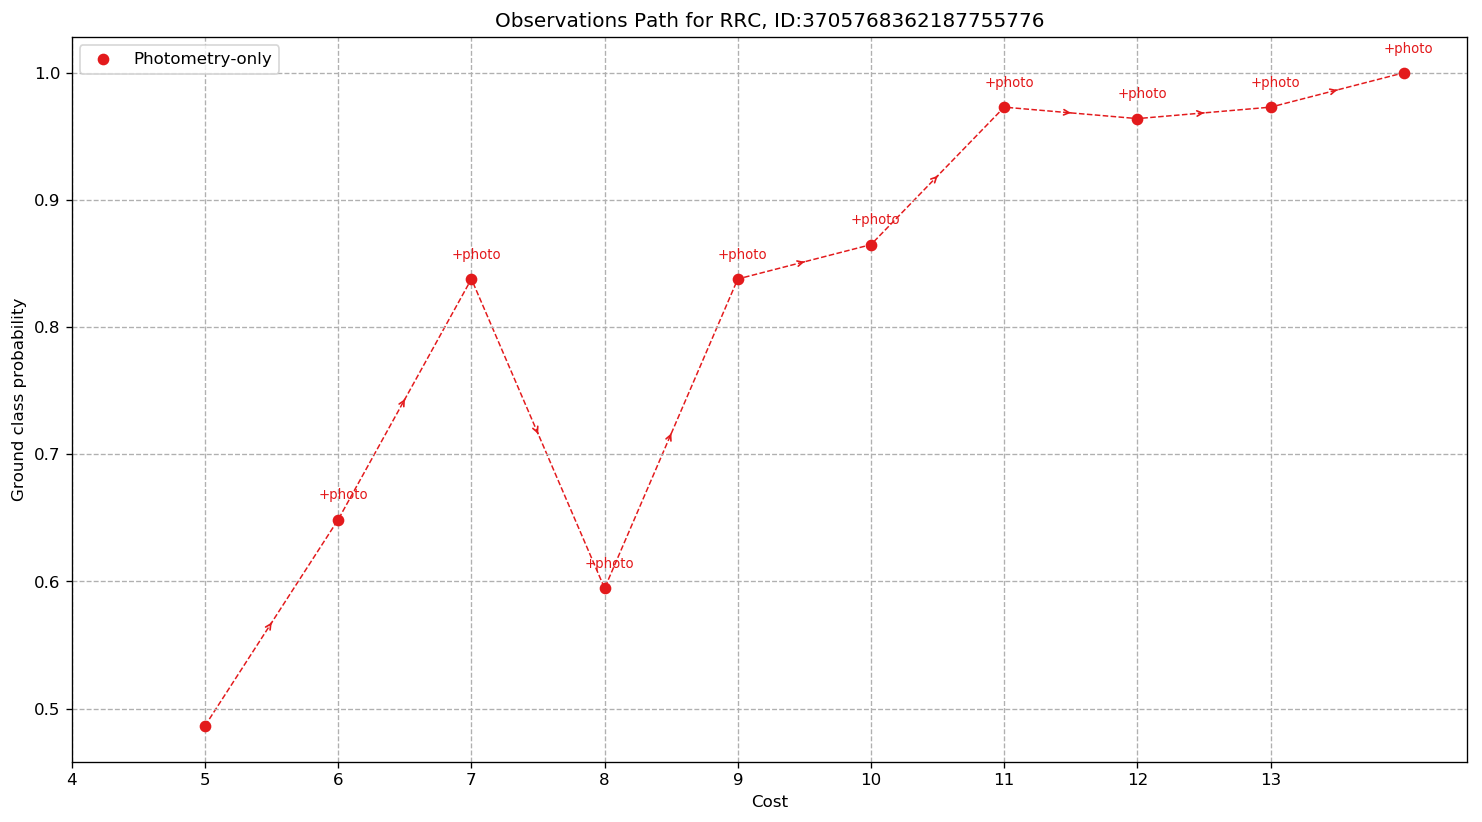

In [3]:
palette = sns.color_palette('Paired')
# all_features = features.set_index('id_gaia').loc[[2766433996366826112]].reset_index().iloc[0]
all_features = features.set_index('id_gaia').loc[[3705768362187755776]].reset_index().iloc[0]
all_clf = pickle.load(open('../../rf/classifiers.pkl', 'rb'))
p_thres = 0.9

tree_args = {'cost_obs': 1, 
             'cost_spec': 5, 
             'cost_col': 1, 
             'all_features': all_features, 
             'all_clf': all_clf,
             'p_thres':p_thres,
             'cost_coeff': 0.025
            }
root_args = {'n_obs': 5, 
             'n_spec': 0, 
             'n_color': 0
            }

fig, ax = plt.subplots(figsize=(15,8), dpi=120)

# greedy_prob = GreedyTree(greedy_on='probability', strategy_name='prob_greedy', **tree_args)
# greedy_prob.create_root(**root_args)
# greedy_prob.build_greedy()
# greedy_prob.plot_path(ax, 'Greedy on probability', palette[1])

# greedy_reward = GreedyTree(greedy_on='reward', strategy_name='reward_greedy', **tree_args)
# greedy_reward.create_root(**root_args)
# greedy_reward.build_greedy()
# greedy_reward.plot_path(ax, 'Greedy on reward', palette[3])

photo = PhotoTree(**tree_args, strategy_name='photometry_only')
photo.create_root(**root_args)
photo.build_tree()
photo.plot_path(ax, 'Photometry-only', palette[5])

# brute = BruteForceTree(**tree_args, strategy_name='brute_force')
# brute.create_root(**root_args)
# brute.build_tree()
# brute.plot_path(ax, 'Brute-force', palette[7])

# random = RandomTree(**tree_args, strategy_name='random')
# random.create_root(**root_args)
# random.build_tree()
# random.plot_path(ax, 'Random', palette[9])
# brute.plot_reward_contour(ax, reward=0.7, color='purple')

plt.title('Observations Path for '+all_features.label+ ', ID:'+str(all_features.id_gaia))
plt.show()